# Tarea 2: Derivación numérica

Fecha de envío del PR inicial: **martes 14 de marzo**

Fecha de aceptación del PR: **lunes 20 de marzo**

## Ejercicio 1: Derivada *derecha*

(a) Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la aproximación de la derivada, que se basa en su definición:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

lo que requiere la especificación de `h`. (Este método también se conoce por el nombre de *diferencias finitas*.)

(b) A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). 

Para ser concretos, prueben su implementación de `derivada_derecha` con la función de prueba $f(x) = 3x^3-2$, en $x_0=1$. Dibujen, como función de $h$, el error de su cálculo; usen escala logarítmica en ambos ejes. A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada, o sea, cómo nos acercamos al valor *exacto* de la deriva al considerar $lim_{h\to 0}$? 


In [1]:
doc"""
derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}\$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_derecha(f,h,x0 = 0.0)
    # código
    num=f(x0+h)-f(x0) #Numerador
    deno=h            #Denominador
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_derecha

In [2]:
methods(derivada_derecha)

# 2 methods for generic function "derivada_derecha":
derivada_derecha(f, h) at In[1]:18
derivada_derecha(f, h, x0) at In[1]:18

In [3]:
?derivada_derecha

search:



derivada_derecha(f,h,x0)

Esta función calcula la derivada derecha de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_+}{\Delta x} = \frac{f(x_0+h)-f(x_0)}{h}$

Su estructura es la siguiente:

derivada_derecha([función],[h],[x0])

Por defecto $x_0=0.0$


In [4]:
#Función a evaluar
function f(x)
    return 3x^3-2
end

f (generic function with 1 method)

Cálculo analítico de la derivada

Aplicando la fórmula para la derivada a la función $f(x)=3x³-2$ con $x_0=1$ tenemos: $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{(3(h³+3h²x_0+3hx_0²+x_0³)-2)-(3x_0³-2)}{h}=\lim_{h \to 0}  \frac{(3h³+9h²x_0+9hx_0²+3x_0³-2)-(3x_0³-2)}{h} = \lim_{h \to 0} \frac{3h³+9h²x_0+9hx_0²+3x_0³-2-3x_0³+2}{h}=\lim_{h \to 0}  \frac{3h³+9h²x_0+9hx_0²}{h}=\lim_{h \to 0} \frac{h(3h²+9hx_0+9x_0²)}{h} =\lim_{h \to 0}  (3h²+9hx_0+9x_0²) =9x_0²$ 
como $x_0=1$ entonces $\lim_{h \to 0} \frac{(3(x_0+h)³-2)-(3x_0³-2)}{h} =9$

In [5]:
deri=derivada_derecha(f,0.00000000001,1.0)

9.000000744663339

Cálculo del error absoluto

In [6]:
Error_absoluto=abs(deri-9)

7.446633389918134e-7

In [10]:
vector_h=[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.5]

15-element Array{Float64,1}:
 1.0e-7
 1.0e-6
 1.0e-5
 0.0001
 0.001 
 0.01  
 0.1   
 0.15  
 0.2   
 0.25  
 0.3   
 0.35  
 0.4   
 0.45  
 0.5   

In [11]:
len=length(vector_h) #Cantidad de valores de h
error=[] #Vector vacio que será llenado con los valores de error para cada h.
#der=[]
for i=1:len
    
   derivadas=BigFloat(derivada_derecha(f,vector_h[i],1.0))#Valor de la derivada para cada h.
    
    Error_absoluto=abs(derivadas-9)#Valor del error para cada derivada. 
    #println(i,"\t",Error_absoluto)
    #println(i,"\t",derivadas)
    #push!(der,derivadas)
    push!(error,Error_absoluto)#Agregamos los valores de error obtenidos al vector. 
    
end

In [12]:
error

15-element Array{Any,1}:
 9.045354545378359034657478332519531250000000000000000000000000000000000000000000e-07
 8.999393571684777271002531051635742187500000000000000000000000000000000000000000e-06
 9.000033286099551332881674170494079589843750000000000000000000000000000000000000e-05
 9.000299939856404307647608220577239990234375000000000000000000000000000000000000e-04
 9.002999998294569650170160457491874694824218750000000000000000000000000000000000e-03
 9.029999999999560600372205954045057296752929687500000000000000000000000000000000e-02
 9.300000000000121502807814977131783962249755859375000000000000000000000000000000e-01
 1.417499999999993320898283855058252811431884765625000000000000000000000000000000    
 1.919999999999999928945726423989981412887573242187500000000000000000000000000000    
 2.437500000000000000000000000000000000000000000000000000000000000000000000000000    
 2.970000000000004192202140984591096639633178710937500000000000000000000000000000    
 3.51750000000000362376795237

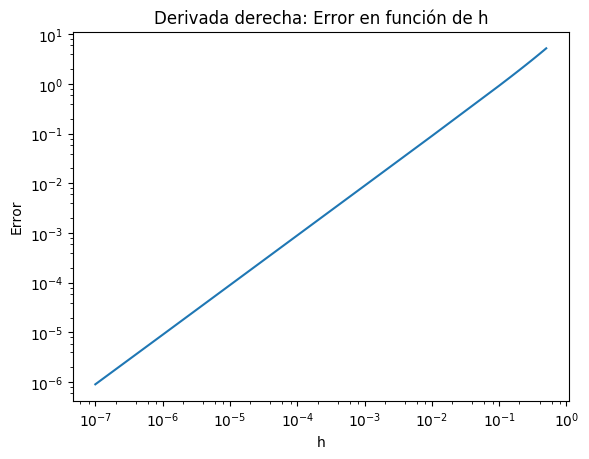

In [13]:
using PyPlot

plot(vector_h,error)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas)
xlabel("h") #Etiqueta para el eje X
ylabel("Error")#Etiqueta para el eje Y
title("Derivada derecha: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()




El error disminuye confome damos una h más pequeña

## Ejercicio 2: Derivada simétrica

Repitan el ejercicio anterior usando la aproximación que se basa en la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}

¿Qué pueden concluir respecto a la convergencia? ¿Cómo se compara este algoritmo con el del ejercicio anterior?

In [14]:
doc"""
derivada_simetrica(f,h,x0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

\$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}\$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_simetrica(f,h,x0 = 0.0)
    
    num=f(x0+h)-f(x0-h)
    deno=2*h
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_simetrica

In [15]:
?derivada_simetrica

search:



derivada_simetrica(f,h,x0)

Esta función calcula la derivada simetrica de una función utilizando la expresión:

$f'(x_0) \approx \frac{ \Delta f_{sym}}{\Delta x} = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}$

Su estructura es la siguiente:

derivada_simetrica([función],[h],[x0])

Por defecto $x_0=0.0$


In [16]:
derivada_simetrica(f,0.00000000001,1.0)

9.000000744663339

In [17]:
error_2=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_2=BigFloat(derivada_simetrica(f,vector_h[i],1.0))#Valor de la derivada para cada h.
    
    Error_absoluto_2=abs(derivadas_2-9)#Valor del error para cada derivada. 

    push!(error_2,Error_absoluto_2)#Agregamos los valores de error obtenidos al vector. 
    
end

In [18]:
error_2

15-element Array{Any,1}:
 8.139124929584795609116554260253906250000000000000000000000000000000000000000000e-10
 7.426592674164567142724990844726562500000000000000000000000000000000000000000000e-11
 3.032099016309075523167848587036132812500000000000000000000000000000000000000000e-10
 2.999501447220609406940639019012451171875000000000000000000000000000000000000000e-08
 2.999999257013996611931361258029937744140625000000000000000000000000000000000000e-06
 3.000000000046298964662128128111362457275390625000000000000000000000000000000000e-04
 3.000000000000468958205601666122674942016601562500000000000000000000000000000000e-02
 6.749999999999722888333053560927510261535644531250000000000000000000000000000000e-02
 1.199999999999992184029906638897955417633056640625000000000000000000000000000000e-01
 1.875000000000000000000000000000000000000000000000000000000000000000000000000000e-01
 2.700000000000031263880373444408178329467773437500000000000000000000000000000000e-01
 3.67500000000001492139745096

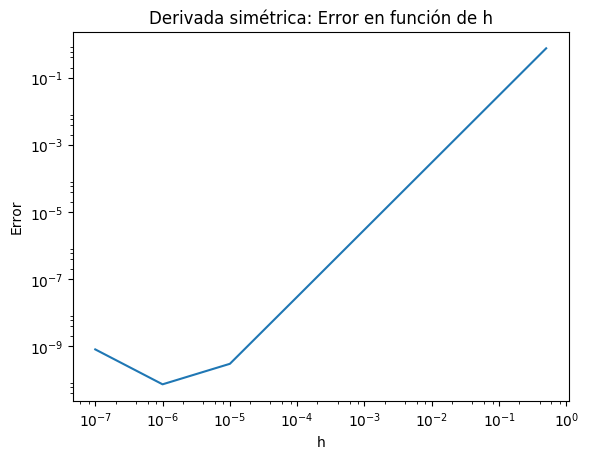

In [19]:
using PyPlot

plot(vector_h,error_2)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada simétrica: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()


En general el error es difectamente proporcional a h, excepto en cierto intervalo. 

## Ejercicio 3: Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Esto es, nos basaremos en la definición de la derivada dada por:

\begin{equation}
f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [20]:
doc"""
derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

\$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)\$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto \$x_0=0.0\$

"""

function derivada_compleja(f,h,x0 = 0.0)
    
    num=f(x0+h*im)
    deno=h
    
    derivada=num/deno
    
    return derivada 
    
end

derivada_compleja

In [42]:
?derivada_compleja

search:



derivada_compleja(f,h,x0)

Esta función calcula la derivada compleja de una función utilizando la expresión:

$f'(x_0) \approx \frac{\Delta f_{cmplx}(x_0)}{\Delta x} = \Im\Big(\frac{f(x_0+ i h)}{h}\Big)$

Su estructura es la siguiente:

derivada_compleja([función],[h],[x0])

Por defecto $x_0=0.0$


In [22]:
derivada_compleja(f,0.00000000001,1.0)

1.0e11 + 9.0im

In [24]:
error_3=[]#Vector vacio que será llenado con los valores de error para cada h.

for i=1:len
    
   derivadas_3=derivada_compleja(f,vector_h[i],1.0)#Valor de la derivada para cada h.
    
    Error_absoluto_3=abs(derivadas_3-9)#Valor del error para cada derivada. 

    push!(error_3,Error_absoluto_3)#Agregamos los valores de error obtenidos al vector. 
    
end

In [25]:
error_3

15-element Array{Any,1}:
      9.99999e6
 999991.0      
  99991.0      
   9991.0      
    991.032    
     91.3544   
      8.97056  
      9.66212  
     10.6063   
     11.4115   
     12.0919   
     12.6837   
     13.2136   
     13.6994   
     14.1532   

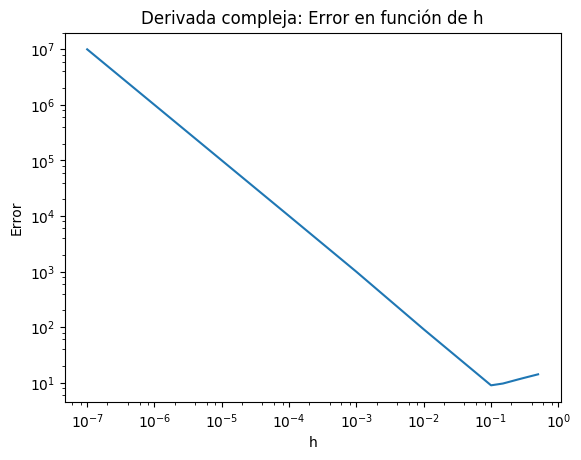

In [26]:
using PyPlot

plot(vector_h,error_3)#Vectores a graficar: plot([vector de valores para el eje X],[vector de valores para el eje Y])
#plot(vector_h,derivadas_2)
xlabel("h") #Etiqueta para el eje X
ylabel("Error") #Etiqueta para el eje Y
title("Derivada compleja: Error en función de h")#Título de la gráfica

xscale("log")#Escala logarítmica para el eje X
yscale("log")#Escala logarítmica para el eje Y

show()

## Ejercicio 4: Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

- ¿Qué comportamiento mostrado por las derivadas en términos de $h$ nos incomoda más? ¿A qué atribuyen esto?